In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
)

from sklearn.model_selection import train_test_split, cross_validate
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)
diabets = pd.read_csv("data/breast_cancer.csv")
df = diabets.copy()

In [3]:
df.shape

(569, 32)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.000,30371831.432,125020585.612,8670.000,869218.000,906024.000,8813129.000,911320502.000
radius_mean,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness_mean,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [8]:
df.isna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df = df.dropna(axis="columns")

In [12]:
df = df.drop("id", axis=1)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


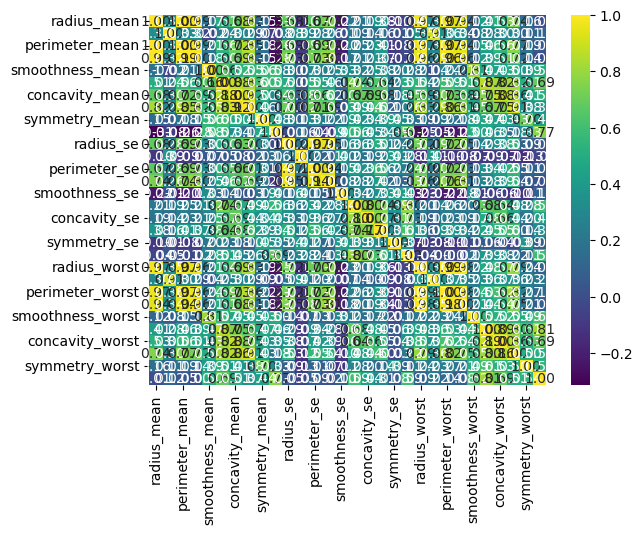

In [14]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
# Correlation Matrix and Heatmap 

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.show()

In [15]:
corr_matrix = corr.abs()
# Select upper triangle of correlation matrix and return index of columns bigger than 0.90

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_list = [col for col in upper.columns if any(upper[col] > 0.90)]

In [16]:
drop_list

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [17]:
df = df.drop(drop_list, axis=1)

In [18]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.380,0.118,0.278,0.300,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,0.162,0.666,0.712,0.460,0.119
1,M,20.570,17.770,0.085,0.079,0.087,0.181,0.057,0.543,0.734,0.005,0.013,0.019,0.013,0.014,0.004,0.124,0.187,0.242,0.275,0.089
2,M,19.690,21.250,0.110,0.160,0.197,0.207,0.060,0.746,0.787,0.006,0.040,0.038,0.021,0.022,0.005,0.144,0.424,0.450,0.361,0.088
3,M,11.420,20.380,0.142,0.284,0.241,0.260,0.097,0.496,1.156,0.009,0.075,0.057,0.019,0.060,0.009,0.210,0.866,0.687,0.664,0.173
4,M,20.290,14.340,0.100,0.133,0.198,0.181,0.059,0.757,0.781,0.011,0.025,0.057,0.019,0.018,0.005,0.137,0.205,0.400,0.236,0.077


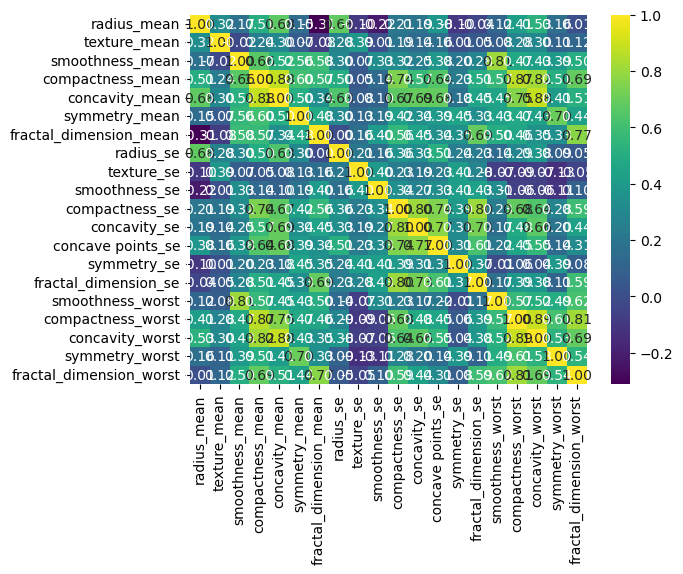

In [19]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
# Correlation Matrix and Heatmap

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
# label encoding

In [21]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [
    col
    for col in df.columns
    if df[col].dtype not in [int, float] and df[col].nunique() == 2
]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()
# 1 = M and 0 = B

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.380,0.118,0.278,0.300,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,0.162,0.666,0.712,0.460,0.119
1,1,20.570,17.770,0.085,0.079,0.087,0.181,0.057,0.543,0.734,0.005,0.013,0.019,0.013,0.014,0.004,0.124,0.187,0.242,0.275,0.089
2,1,19.690,21.250,0.110,0.160,0.197,0.207,0.060,0.746,0.787,0.006,0.040,0.038,0.021,0.022,0.005,0.144,0.424,0.450,0.361,0.088
3,1,11.420,20.380,0.142,0.284,0.241,0.260,0.097,0.496,1.156,0.009,0.075,0.057,0.019,0.060,0.009,0.210,0.866,0.687,0.664,0.173
4,1,20.290,14.340,0.100,0.133,0.198,0.181,0.059,0.757,0.781,0.011,0.025,0.057,0.019,0.018,0.005,0.137,0.205,0.400,0.236,0.077


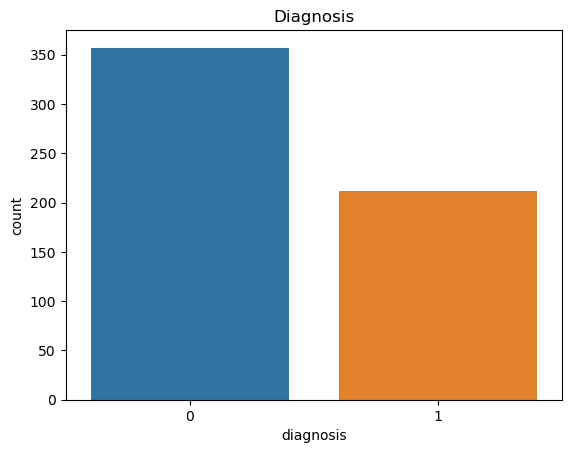

In [23]:
sns.countplot(x="diagnosis", data=df)
plt.title("Diagnosis")
plt.show()
# data visualization

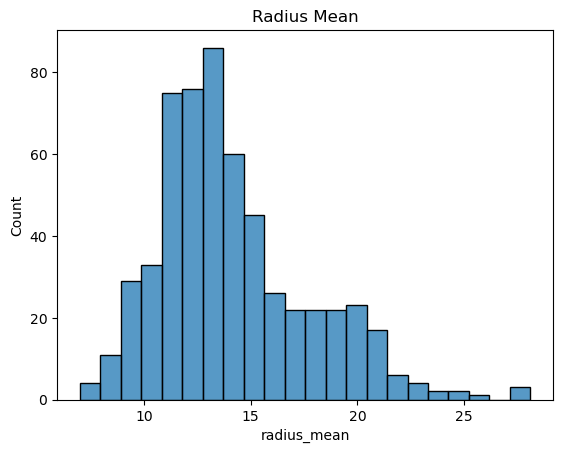

In [24]:
sns.histplot(df["radius_mean"])
plt.title("Radius Mean")
plt.show()

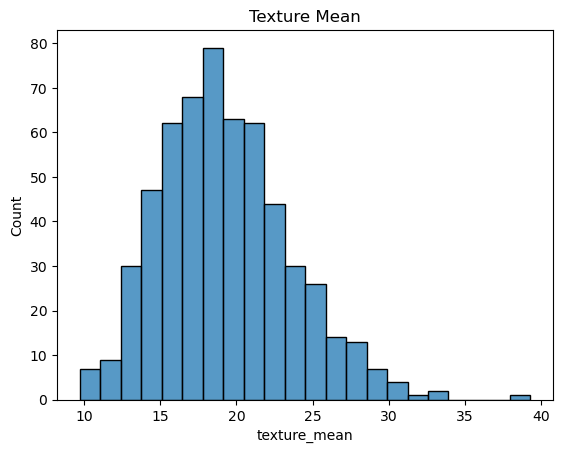

In [25]:
sns.histplot(df["texture_mean"])
plt.title("Texture Mean")
plt.show()

In [26]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)
# Holdout method

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [27]:
log_model = LogisticRegression().fit(X_train, y_train)

In [28]:
y_pred = log_model.predict(X_train)
y_prob = log_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       281
           1       0.94      0.90      0.92       174

    accuracy                           0.94       455
   macro avg       0.94      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



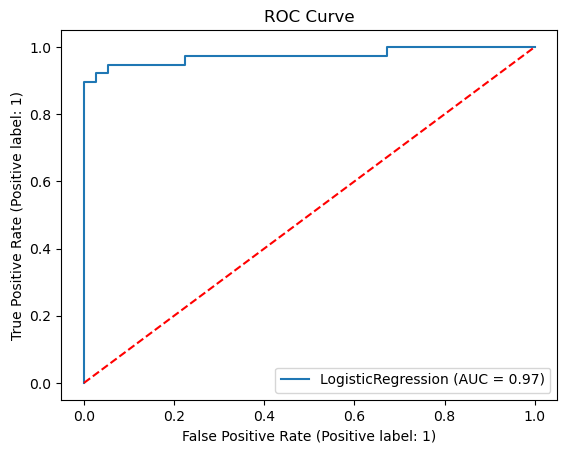

In [29]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show()
# ROC Curve

In [30]:
roc_auc_score(y_train, y_prob)

0.9880353417597251

In [31]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.92      0.92      0.92        38

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



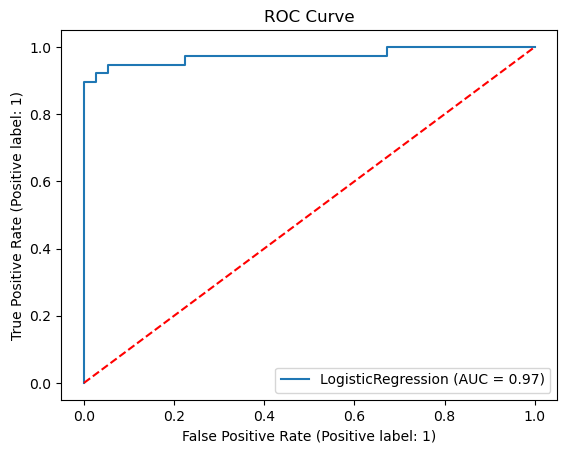

In [32]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show()
# ROC Curve

In [33]:
roc_auc_score(y_test, y_prob)

0.974376731301939

In [34]:
X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]
# Model validation with cross validation

log_model = LogisticRegression().fit(X, y)
cv_results = cross_validate(
    log_model, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"]
)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [35]:
cv_results["test_accuracy"].mean()

0.9331766917293234

In [36]:
cv_results["test_precision"].mean()

0.9342157477025899

In [37]:
cv_results["test_recall"].mean()

0.8878787878787879

In [38]:
cv_results["test_f1"].mean()

0.9067462903663162

In [39]:
cv_results["test_roc_auc"].mean()

0.9841606541606541

In [40]:
cv_results["test_accuracy"].mean()
#0.9331766917293234

cv_results["test_precision"].mean()
# 0.9342157477025899

cv_results["test_recall"].mean()
# 0.8878787878787879

cv_results["test_f1"].mean()
# 0.9067462903663162

cv_results["test_roc_auc"].mean()
# 0.9841606541606541

0.9841606541606541

In [41]:
"""
For X_train
accuracy: 0.95  / doğru olarak sınıflandırılanların oranı
precision: 0.94 / pozitif olarak tahmin edilenlerin gerçekten pozitif olma oranı (TP/(TP+FP)
recall: 0.90 / gerçekten pozitif olanların pozitif olarak tahmin edilme oranı (TP/(TP+FN)
f1-score: 0.92 / precision ve recall harmonik ortalaması
roc_auc_score: 0.9880353417597251 / roc eğrisi altında kalan alan
***************************
For X_test
accuracy: 0.95
precision: 0.92
recall: 0.92
f1-score: 0.92
roc_auc_score: 0.974376731301939
***************************
For Cross Validation
accuracy: 0.93
precision: 0.93
recall: 0.89
f1-score: 0.91
roc_auc_score: 0.98
***************************
maybe overfitting
***************************
"""

'\nFor X_train\naccuracy: 0.95  / doğru olarak sınıflandırılanların oranı\nprecision: 0.94 / pozitif olarak tahmin edilenlerin gerçekten pozitif olma oranı (TP/(TP+FP)\nrecall: 0.90 / gerçekten pozitif olanların pozitif olarak tahmin edilme oranı (TP/(TP+FN)\nf1-score: 0.92 / precision ve recall harmonik ortalaması\nroc_auc_score: 0.9880353417597251 / roc eğrisi altında kalan alan\n***************************\nFor X_test\naccuracy: 0.95\nprecision: 0.92\nrecall: 0.92\nf1-score: 0.92\nroc_auc_score: 0.974376731301939\n***************************\nFor Cross Validation\naccuracy: 0.93\nprecision: 0.93\nrecall: 0.89\nf1-score: 0.91\nroc_auc_score: 0.98\n***************************\nmaybe overfitting\n***************************\n'